In [111]:
from lxml import html
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
country='BGD'
forwardDate = 'lm_2020-06-08'
page = requests.get('https://www.worldometers.info/coronavirus/news-block/news_main_updates.php?fd='+c+'&country='+c+'&region=%27%27&days_count=300')
tree = html.fromstring(page.content)

In [112]:
#This will create a list of cases:
cases = tree.xpath('//div[@class="newsdate_div"]/*')
dates = tree.xpath('//div[@class="newsdate_div"]/@id')
singledataset = pd.DataFrame(columns=['date','new cases','new deaths'])
i=1
j=0
singledata = pd.Series(data=['0','0','0'], index=singledataset.columns) 
for row in cases:
    if i%2==0:        
        singledata[0] = dates[j].lstrip("newsdate")
        for deathcase in row.findall('.//strong'):
                NoneType = type(None)
                if type(deathcase.text) == NoneType:
                    continue                   
                if (deathcase.text.find("new cases") != -1):
                    singledata[1] = deathcase.text.rstrip("new cases")
                    
                if (deathcase.text.find("new deaths") != -1):
                    singledata[2] = deathcase.text.rstrip("new deaths")
        j+=1
        print(singledata)
        singledataset.loc[j] = singledata
        singledata=pd.Series(data=['0','0','0'], index=singledataset.columns) 
    i+=1

date          2020-06-07
new cases          2,743
new deaths            42
dtype: object
date          2020-06-06
new cases          2,635
new deaths            35
dtype: object
date          2020-06-05
new cases          2,828
new deaths            30
dtype: object
date          2020-06-04
new cases          2,423
new deaths            35
dtype: object
date          2020-06-03
new cases          2,695
new deaths            37
dtype: object
date          2020-06-02
new cases          2,911
new deaths            37
dtype: object
date          2020-06-01
new cases          2,381
new deaths            22
dtype: object
date          2020-05-31
new cases          2,545
new deaths            40
dtype: object
date          2020-05-30
new cases          1,764
new deaths            28
dtype: object
date          2020-05-29
new cases          2,523
new deaths            23
dtype: object
date          2020-05-28
new cases          2,029
new deaths            15
dtype: object
date          2020-05

In [27]:
print(singledataset)

          date new cases new deaths
1   2020-06-07     2,743         42
2   2020-06-06     2,635         35
3   2020-06-05     2,828         30
4   2020-06-04     2,423         35
5   2020-06-03     2,695         37
..         ...       ...        ...
77  2020-03-21         4          0
78  2020-03-20         2          0
79  2020-03-19         4          0
80  2020-03-18         4          0
81  2020-03-16         3          0

[81 rows x 3 columns]


In [29]:
singledataset.to_csv("data1.csv")

In [106]:
#print(singledataset.iloc[::-1])
singledataset = singledataset.iloc[::-1]
print(singledataset)
singledataset.loc[:, 'date':].to_csv("dataRev.csv")

          date new cases new deaths
80  2020-03-16         3          0
79  2020-03-18         4          0
78  2020-03-19         4          0
77  2020-03-20         2          0
76  2020-03-21         4          0
..         ...       ...        ...
4   2020-06-03     2,695         37
3   2020-06-04     2,423         35
2   2020-06-05     2,828         30
1   2020-06-06     2,635         35
0   2020-06-07     2,743         42

[81 rows x 3 columns]


AttributeError: 'Line2D' object has no property 'kind'

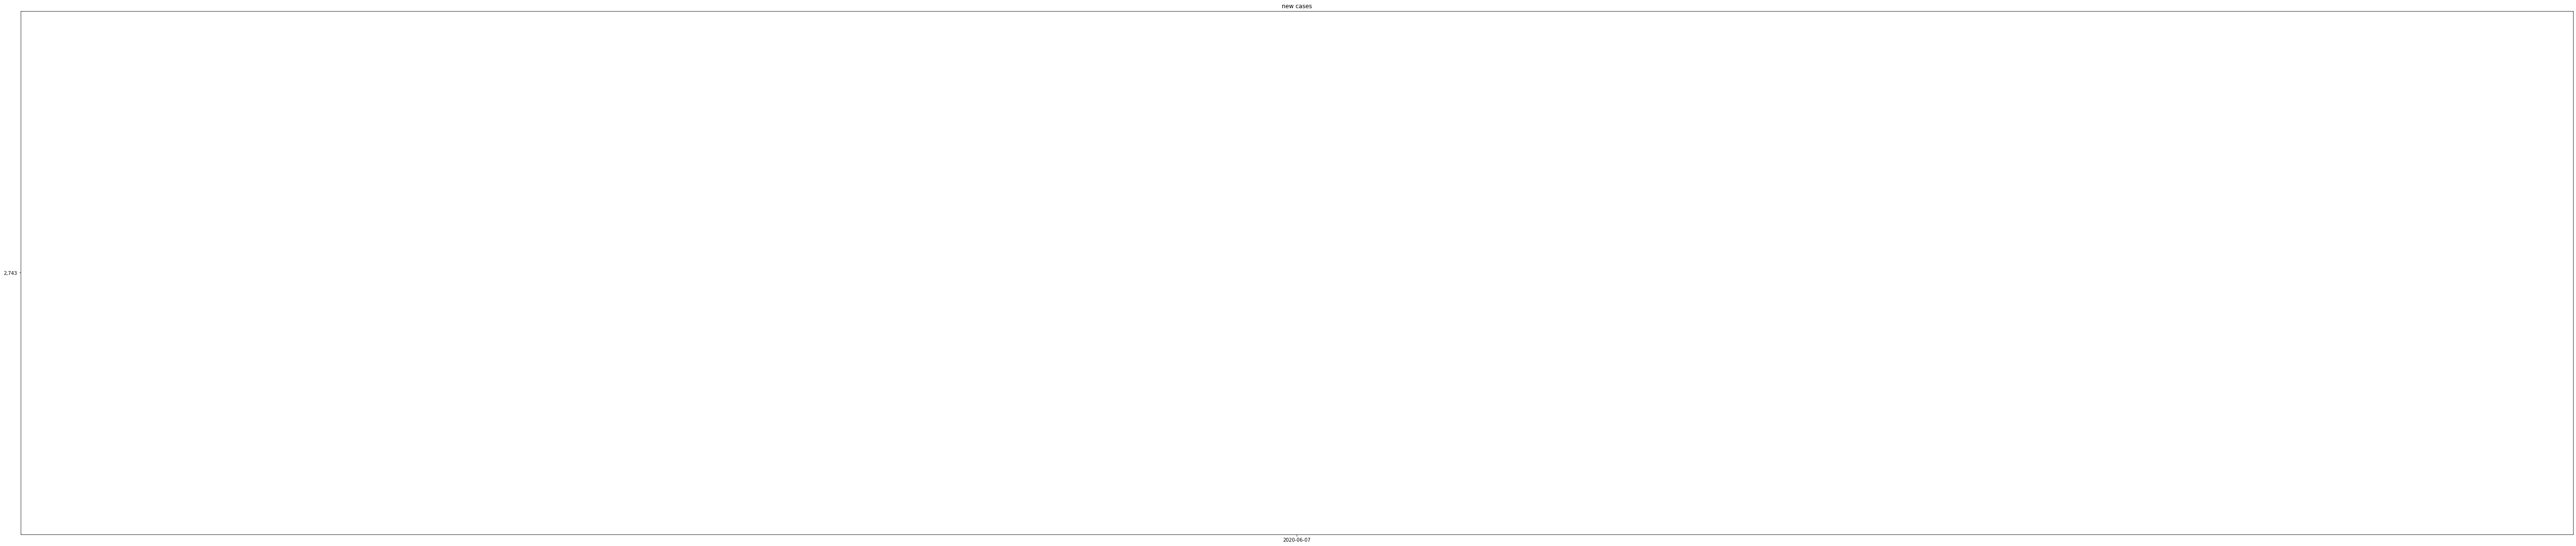

In [116]:
# multiple line plot
plt.figure(figsize=(95,20))
plt.title('new cases', loc='center', fontsize=12, fontweight=0)
plt.plot( 'date', 'new cases', data=singledataset, marker='', markerfacecolor='blue', kind='scatter', markersize=12, color='skyblue', linewidth=4)

plt.savefig('./newCases.png')
plt.legend()


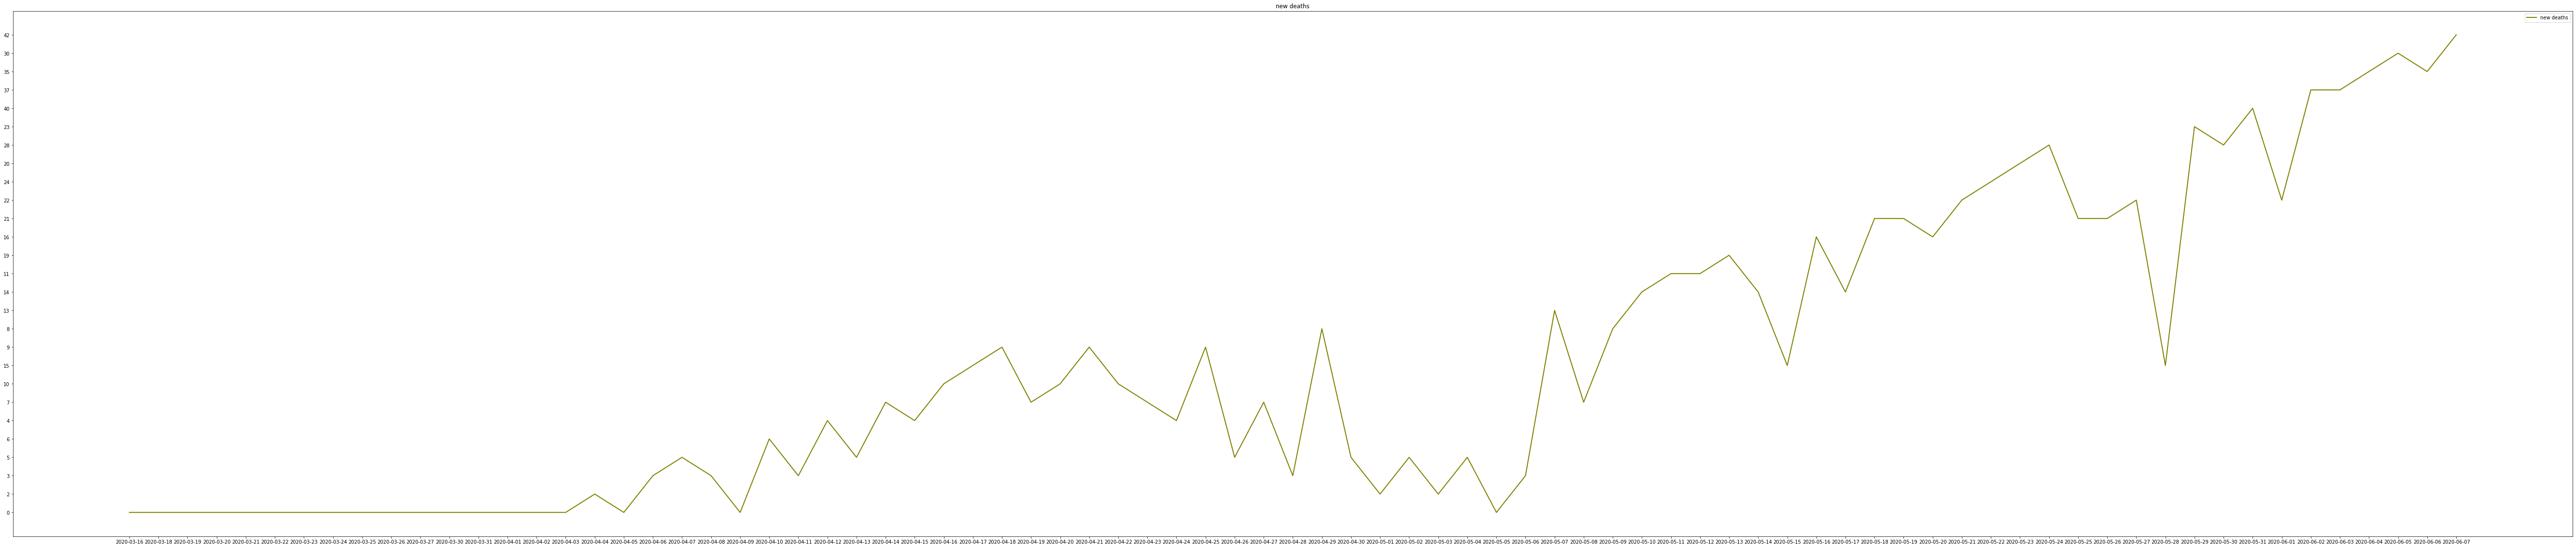

In [108]:
plt.figure(figsize=(95,20))
plt.title('new deaths', loc='center', fontsize=12, fontweight=0)
plt.plot( 'date', 'new deaths', data=singledataset, marker='', color='olive', linewidth=2)
plt.savefig('./newDeaths.png')
plt.legend()